<a href="https://colab.research.google.com/github/BANOTHSANDEEP5/ANN-MODEL/blob/main/ANN_mtp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

In [289]:
data = pd.read_csv('data_csv.csv')

In [290]:
data

,water/binder,Binder (kg/m^3),Fly ash (%),GGBS (%),SP (%),Aggregate (CA/ FA),Curing Days,Curing condition,Porosity (%)
0,0.35,591,0,20,0.7,1.70,56,Air,2.2
1,0.35,591,0,0,0.7,1.70,56,Air,2.6
2,0.35,591,0,10,0.7,1.70,56,Air,2.7
3,0.35,591,0,40,0.7,1.70,56,Air,2.8
4,0.35,591,0,40,0.7,1.70,28,Air,4.1
...,...,...,...,...,...,...,...,...,...
237,0.50,400,50,0,0.0,1.67,91,Air,16.5
238,0.40,400,67,0,1.9,1.67,91,Air,16.5
239,0.41,239,190,0,6.0,1.27,28,Air,16.8
240,0.40,400,67,0,1.9,1.67,28,Air,16.8


In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   water/binder        242 non-null    float64
 1   Binder (kg/m^3)     242 non-null    int64  
 2   Fly ash (%)         242 non-null    int64  
 3   GGBS (%)            242 non-null    int64  
 4   SP (%)              242 non-null    float64
 5   Aggregate (CA/ FA)  242 non-null    float64
 6   Curing Days         242 non-null    int64  
 7   Curing condition    242 non-null    object 
 8   Porosity (%)        242 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 17.1+ KB


In [292]:
data.isnull().sum()

water/binder          0
Binder (kg/m^3)       0
Fly ash (%)           0
GGBS (%)              0
SP (%)                0
Aggregate (CA/ FA)    0
Curing Days           0
Curing condition      0
Porosity (%)          0
dtype: int64

In [293]:
data.corr()

<ipython-input-293-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,water/binder,Binder (kg/m^3),Fly ash (%),GGBS (%),SP (%),Aggregate (CA/ FA),Curing Days,Porosity (%)
water/binder,1.000000,-0.510701,-0.182718,0.156652,-0.255108,-0.536601,-0.178849,0.207586
Binder (kg/m^3),-0.510701,1.000000,-0.303545,0.360420,0.049214,0.102857,-0.151126,-0.453192
Fly ash (%),-0.182718,-0.303545,1.000000,-0.256679,0.708347,-0.001790,0.062790,0.387024
GGBS (%),0.156652,0.360420,-0.256679,1.000000,-0.022592,-0.404564,-0.264544,-0.307085
SP (%),-0.255108,0.049214,0.708347,-0.022592,1.000000,-0.221466,-0.156901,0.315094
Aggregate (CA/ FA),-0.536601,0.102857,-0.001790,-0.404564,-0.221466,1.000000,0.532675,0.027882
Curing Days,-0.178849,-0.151126,0.062790,-0.264544,-0.156901,0.532675,1.000000,-0.156452
Porosity (%),0.207586,-0.453192,0.387024,-0.307085,0.315094,0.027882,-0.156452,1.000000


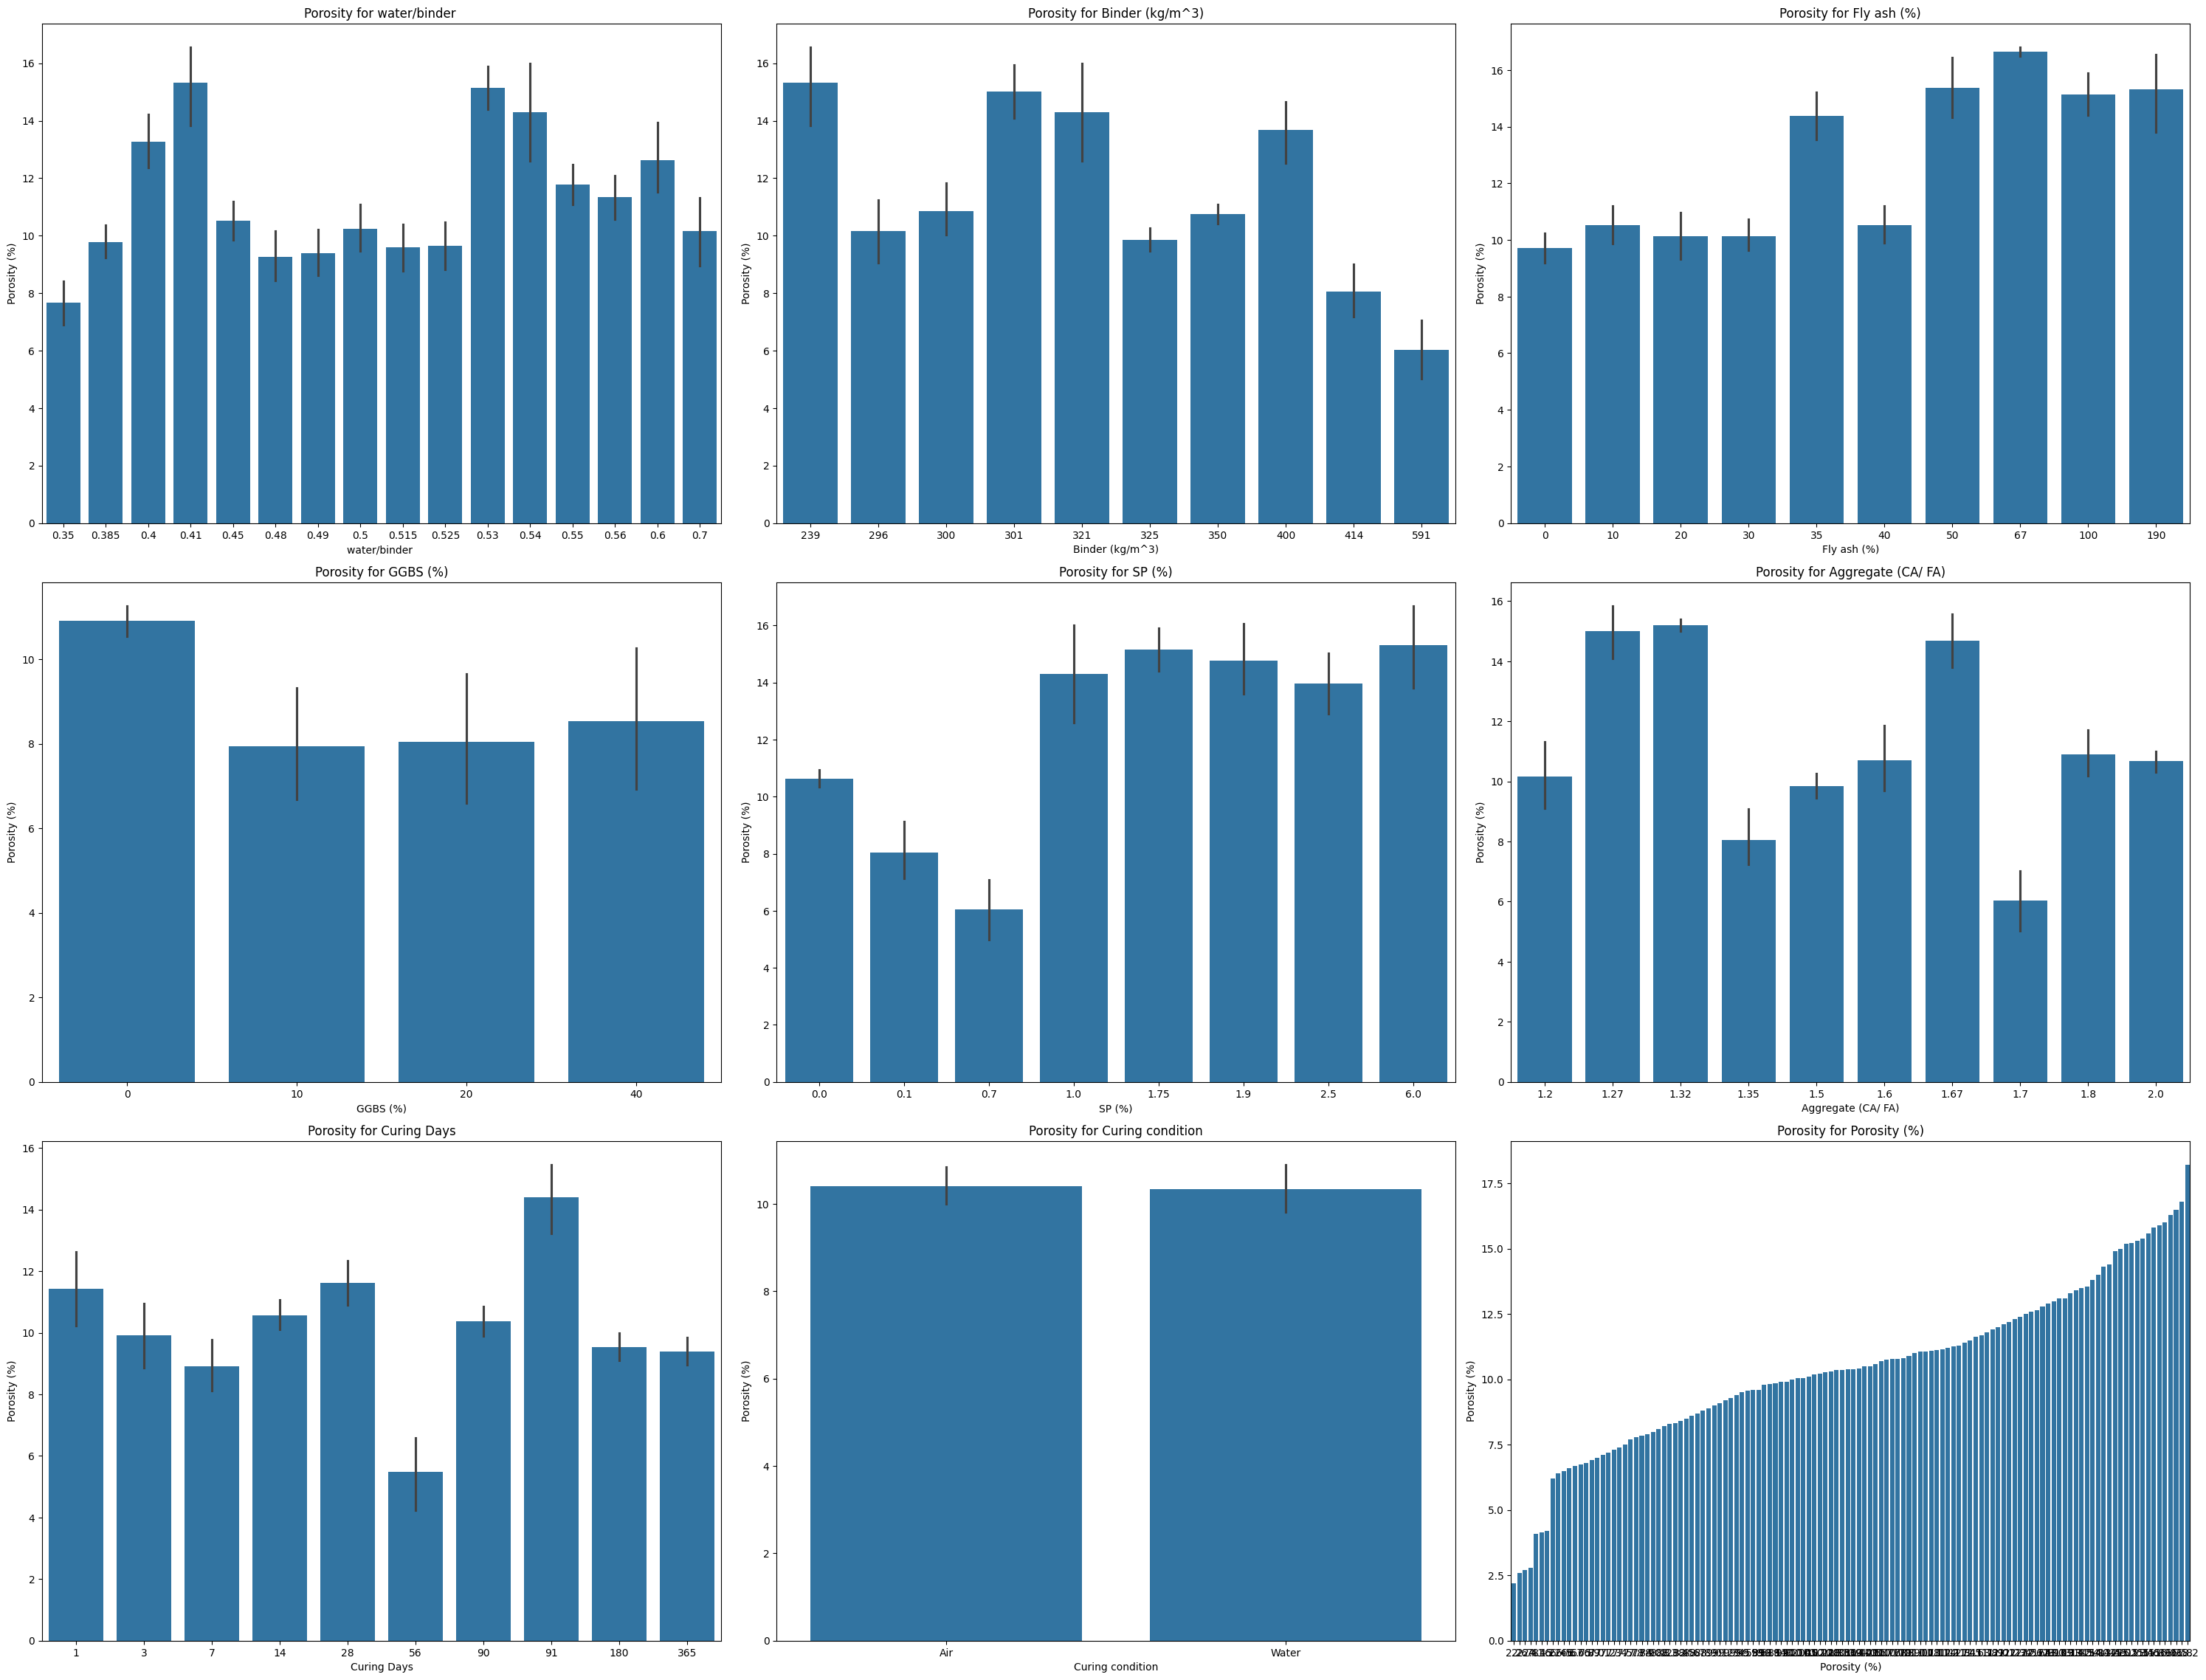

In [294]:
plt.figure(figsize=[30, 30])

# Loop through columns
for i, col in enumerate(data.columns):
    plt.subplot(4, 3, i + 1)  # Use 'i' to index the subplots
    sb.barplot(data=data, x=col, y='Porosity (%)')  # Swap x and y for barplot
    plt.title(f'Porosity for {col}')  # Add a title for each subplot

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()

<ipython-input-295-454fee5d113c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = data.corr()


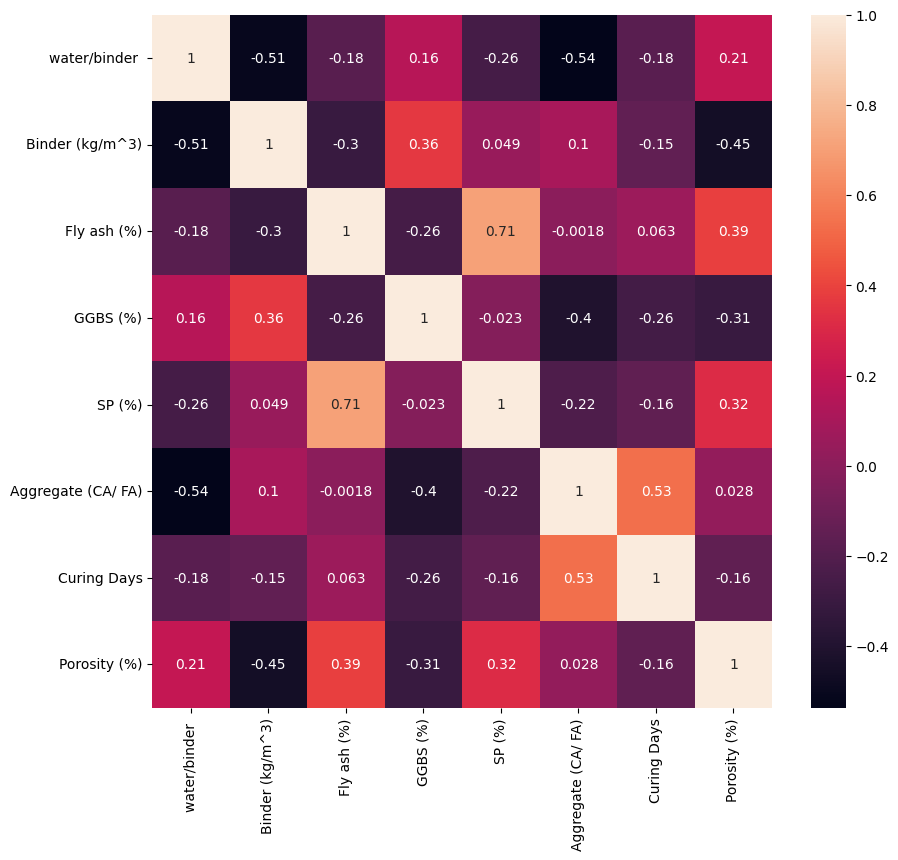

In [295]:
corrMatrix = data.corr()
plt.gcf().set_size_inches(10,9)
sb.heatmap(corrMatrix, annot=True)
plt.show()

In [307]:
X = data[['water/binder ', 'Binder (kg/m^3)', 'Fly ash (%)', 'GGBS (%)', 'SP (%)', 'Aggregate (CA/ FA)', 'Curing Days', 'Curing condition']]
y = data['Porosity (%)']

In [308]:
X = pd.get_dummies(X, columns=['Curing condition'])

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [332]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [333]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

In [334]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [377]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 25ms/step - loss: 1.2410 - val_loss: 2.7452
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 1.2272 - val_loss: 2.7278
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 1.2109 - val_loss: 2.8086
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 1.3873 - val_loss: 3.3713
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 1.4428 - val_loss: 3.0267
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 1.3829 - val_loss: 2.8561
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 1.3584 - val_loss: 2.8243
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 1.2450 - val_loss: 2.8398
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 1.2528 - val_loss: 2.7382
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 1.2430 - val_loss: 2.6398
Epoch 11/100
7/7 [==

In [378]:
loss = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)


Test loss: 2.622601270675659


In [379]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [380]:
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.6931175761370664
